Matriz Reconstruida Normalizada (en el rango [0, 255]):
[[127.5        127.5         51.         127.5        127.5       ]
 [127.5         51.         204.0000286   51.         127.5       ]
 [127.5         51.          51.          51.         127.5       ]
 [127.5          0.         255.          51.         127.5       ]
 [127.5         51.         204.00000214  51.         127.5       ]]


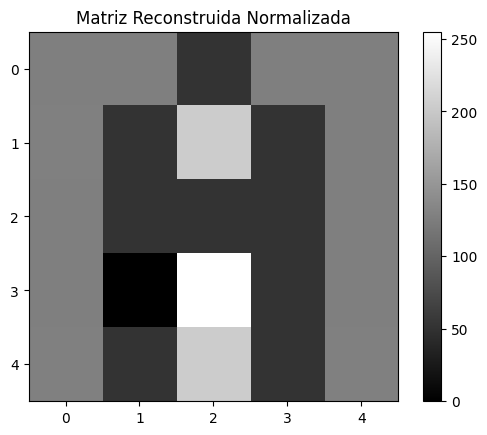

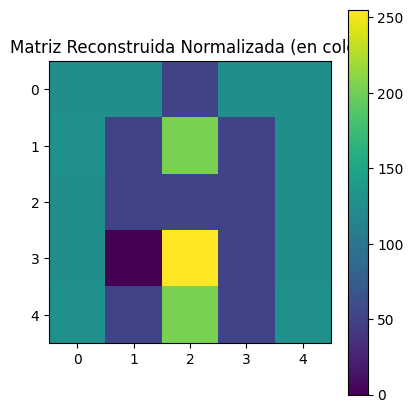

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Función sigmoidal y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Matriz de entrada (5x5) - Cambia esto por tu matriz de entrada
np.random.seed(27)
# input_matrix = np.random.rand(5, 5)

input_matrix = np.array([[0.5, 0.5, 0.2, 0.5, 0.5],
                   [0.5, 0.2, 0.8, 0.2, 0.5],
                   [0.5, 0.2, 0.2, 0.2, 0.5],
                   [0.5, 0.2, 0.8, 0.2, 0.5],
                   [0.5, 0.2, 0.8, 0.2, 0.5]])

# Tasa de aprendizaje y épocas del autoencoder
lr = 0.1
epochs = 1000

# Configuración del autoencoder
input_size = 25
hidden_size = 1

# Inicialización de pesos y sesgos del autoencoder
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.random.rand(1)
weights_hidden_output = np.random.rand(hidden_size, input_size)
bias_output = np.random.rand(input_size)

# Listas para almacenar las matrices a lo largo del entrenamiento del autoencoder
input_matrices = []
output_matrices = []

# Entrenamiento del autoencoder
for epoch in range(epochs):
    # Propagación hacia adelante
    hidden_layer_input = np.dot(input_matrix.reshape(1, -1), weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Normalizar la matriz reconstruida en el rango [0, 1]
    output_layer_output = (output_layer_output - np.min(output_layer_output)) / (np.max(output_layer_output) - np.min(output_layer_output))

    # Almacenar las matrices para su visualización
    input_matrices.append(input_matrix.copy())
    output_matrices.append(output_layer_output.reshape(5, 5).copy())

    # Retropropagación
    error = input_matrix.reshape(1, -1) - output_layer_output
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Actualización de pesos y sesgos
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * lr
    bias_output += np.sum(d_output, axis=0) * lr
    weights_input_hidden += input_matrix.reshape(1, -1).T.dot(d_hidden) * lr
    bias_hidden += np.sum(d_hidden, axis=0) * lr

# Matriz reconstruida final
matriz_resultante = output_matrices[-1]

# Normalizar la matriz reconstruida en el rango [0, 255]
matriz_resultante_normalizada = (matriz_resultante - np.min(matriz_resultante)) / (np.max(matriz_resultante) - np.min(matriz_resultante))
matriz_resultante_normalizada *= 255

# Imprimir y guardar la matriz resultante normalizada
print("Matriz Reconstruida Normalizada (en el rango [0, 255]):")
print(matriz_resultante_normalizada)

# Guardar la matriz resultante normalizada en un archivo de imagen
plt.imsave('matriz_resultante.png', matriz_resultante_normalizada, cmap=cm.gray)

# Visualización de la matriz resultante normalizada en blanco y negro
plt.imshow(matriz_resultante_normalizada, cmap=cm.gray)
plt.title("Matriz Reconstruida Normalizada")
plt.colorbar()

# Visualización de la matriz resultante normalizada en color (viridis)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(matriz_resultante_normalizada, cmap='viridis')
plt.title("Matriz Reconstruida Normalizada (en color)")
plt.colorbar()

# Ahora puedes usar 'matriz_resultante_normalizada' en tu código para la red de Kohonen
plt.show()


<ipython-input-2-fbf43d2bad9e>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  min_distancia = np.iinfo(np.int).max


Iteración 0:
Matriz Original Normalizada:
[[127.5        127.5         51.         127.5        127.5       ]
 [127.5         51.         204.0000286   51.         127.5       ]
 [127.5         51.          51.          51.         127.5       ]
 [127.5          0.         255.          51.         127.5       ]
 [127.5         51.         204.00000214  51.         127.5       ]]
Matriz SOM Resultante:
[[0.39186766 0.40097086 0.21012746 0.9470954  0.33206428]
 [0.63122363 0.83390077 1.51017064 1.24124445 1.635441  ]
 [0.09431946 1.87306954 1.53994631 2.12344358 2.00840413]
 [0.52916523 1.35809908 1.82693713 2.06149038 1.64614552]
 [0.96532066 1.48460733 1.18650518 1.58134878 1.30700544]]


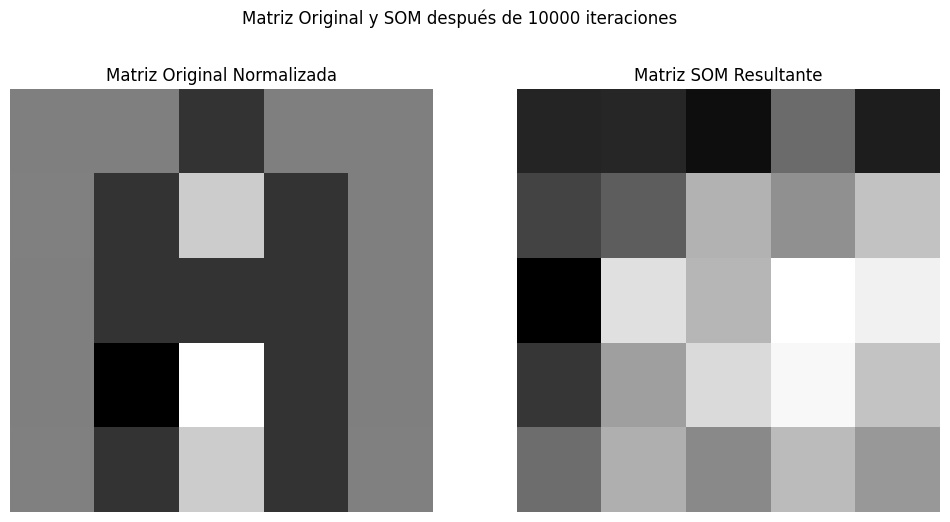

Iteración 100:
Matriz Original Normalizada:
[[127.5        127.5         51.         127.5        127.5       ]
 [127.5         51.         204.0000286   51.         127.5       ]
 [127.5         51.          51.          51.         127.5       ]
 [127.5          0.         255.          51.         127.5       ]
 [127.5         51.         204.00000214  51.         127.5       ]]
Matriz SOM Resultante:
[[ 0.39186766  0.40097086  0.21012746  0.9470954   0.33206428]
 [ 0.63122363  0.83390077 72.78590285 73.5458615  72.84030451]
 [ 0.09431946 72.94350038 75.85452971 77.63613787 76.04660429]
 [ 0.52916523 73.59579697 77.51821346 81.35143422 77.44631032]
 [ 0.96532066 72.77480138 75.70961366 77.42053983 75.75902054]]
Iteración 200:
Matriz Original Normalizada:
[[127.5        127.5         51.         127.5        127.5       ]
 [127.5         51.         204.0000286   51.         127.5       ]
 [127.5         51.          51.          51.         127.5       ]
 [127.5          0.         

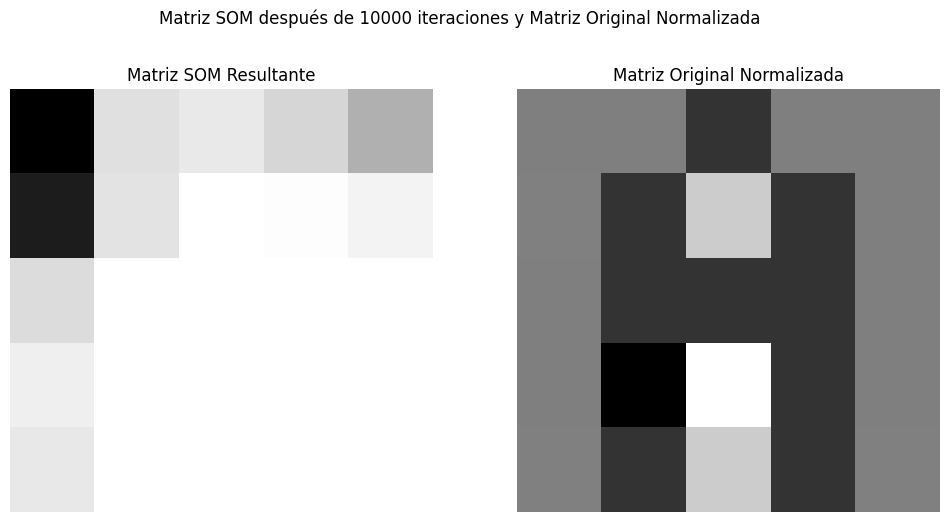

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Utiliza la matriz resultante normalizada en lugar de datos_crudos
datos = matriz_resultante_normalizada.copy()

dimensiones_red = np.array([5, 5])
n_iteraciones = 10000
tasa_aprendizaje_inicial = 0.01

# radio vecindario inicial
radio_inicial = max(dimensiones_red[0], dimensiones_red[1]) / 2
# parámetro de decaimiento del radio
constante_temporal = n_iteraciones / np.log(radio_inicial)

# Definir la red Kohonen
red = np.random.random((dimensiones_red[0], dimensiones_red[1], datos.shape[1]))

def encontrar_bmu(t, red, m):
    bmu_idx = np.array([0, 0])
    min_distancia = np.iinfo(np.int).max

    for x in range(red.shape[0]):
        for y in range(red.shape[1]):
            w = red[x, y, :].reshape(m, 1)
            distancia_cuadrada = np.sum((w - t) ** 2)
            distancia = np.sqrt(distancia_cuadrada)
            if distancia < min_distancia:
                min_distancia = distancia
                bmu_idx = np.array([x, y])

    bmu = red[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    return (bmu, bmu_idx)

def decaer_radio(radio_inicial, i, constante_temporal):
    return radio_inicial * np.exp(-i / constante_temporal)

def decaer_tasa_aprendizaje(tasa_aprendizaje_inicial, i, n_iteraciones):
    return tasa_aprendizaje_inicial * np.exp(-i / n_iteraciones)

def calcular_influencia(distancia, radio):
    return np.exp(-distancia / (2 * (radio ** 2)))

# Preparar la figura para mostrar ambas matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Matriz Original y SOM después de %d iteraciones' % n_iteraciones)
# Visualizar la matriz original (antes del entrenamiento)
axs[0].imshow(matriz_resultante_normalizada, cmap='gray')
axs[0].set_title('Matriz Original Normalizada')
axs[0].axis('off')

for i in range(n_iteraciones):
    # Selecciona un ejemplo de entrenamiento al azar
    t = datos[np.random.randint(0, datos.shape[0]), :].reshape(1, datos.shape[1])

    # Encuentra la Mejor Unidad Coincidente (BMU)
    bmu, bmu_idx = encontrar_bmu(t, red, datos.shape[1])

    # Decaimiento de parámetros SOM
    radio = decaer_radio(radio_inicial, i, constante_temporal)
    tasa_aprendizaje = decaer_tasa_aprendizaje(tasa_aprendizaje_inicial, i, n_iteraciones)

    # Actualiza el vector de pesos para acercarlo a la entrada
    # y acerca a sus vecinos en el espacio 2D
    for x in range(red.shape[0]):
        for y in range(red.shape[1]):
            w = red[x, y, :]  # Vector de pesos en la ubicación (x, y)
            distancia_w = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            distancia_w = np.sqrt(distancia_w)
            if distancia_w <= radio:
                # Calcula el grado de influencia (basado en la distancia 2-D)
                influencia = calcular_influencia(distancia_w, radio)
                # Actualiza directamente el vector de pesos en lugar de cambiar su forma
                red[x, y, :] = w + (tasa_aprendizaje * influencia * (t - w))

    # Visualizar la matriz resultante (después del entrenamiento)
    axs[1].imshow(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]), cmap='gray')
    axs[1].set_title('Matriz SOM Resultante')
    axs[1].axis('off')

    # Imprimir los valores de las matrices después de cada iteración
    if i % 100 == 0:
        print(f"Iteración {i}:")
        print("Matriz Original Normalizada:")
        print(matriz_resultante_normalizada)
        print("Matriz SOM Resultante:")
        print(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]))

    plt.show()

    import numpy as np
import matplotlib.pyplot as plt


# Preparar la figura para mostrar ambas matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Matriz SOM después de %d iteraciones y Matriz Original Normalizada' % n_iteraciones)

for i in range(n_iteraciones):
    # ... (código de entrenamiento anterior) ...

    # Visualizar la matriz resultante (después del entrenamiento)
    if i % 100 == 0:
        axs[0].clear()
        axs[0].imshow(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]), cmap='gray')
        axs[0].set_title('Matriz SOM Resultante')
        axs[0].axis('off')

        axs[1].clear()
        axs[1].imshow(matriz_resultante_normalizada, cmap='gray')
        axs[1].set_title('Matriz Original Normalizada')
        axs[1].axis('off')

        plt.pause(0.1)  # Pausa breve para actualizar la visualización

# Mantén la última visualización al finalizar
axs[0].imshow(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]), cmap='gray')
axs[0].set_title('Matriz SOM Resultante')
axs[0].axis('off')

axs[1].imshow(matriz_resultante_normalizada, cmap='gray')
axs[1].set_title('Matriz Original Normalizada')
axs[1].axis('off')

plt.show()




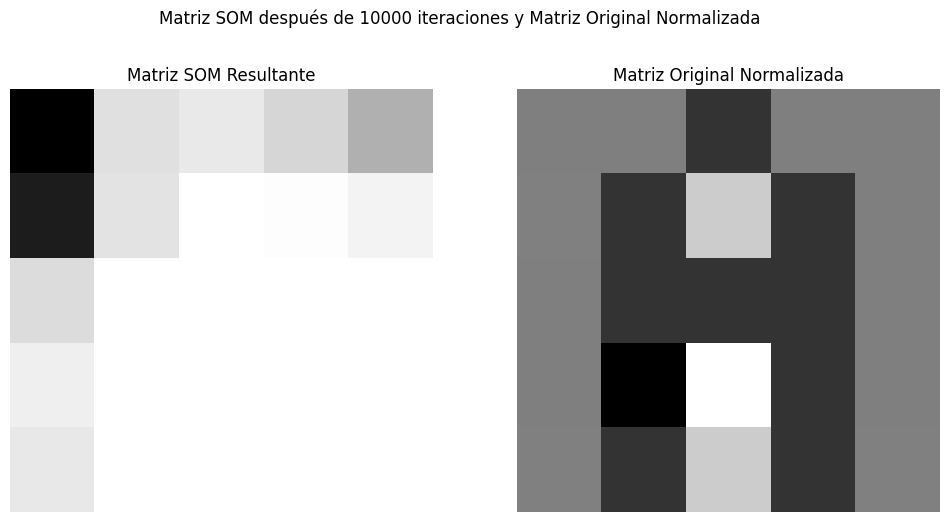

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Preparar la figura para mostrar ambas matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Matriz SOM después de %d iteraciones y Matriz Original Normalizada' % n_iteraciones)

for i in range(n_iteraciones):

    # Visualizar la matriz resultante (después del entrenamiento)
    if i % 100 == 0:
        axs[0].clear()
        axs[0].imshow(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]), cmap='gray')
        axs[0].set_title('Matriz SOM Resultante')
        axs[0].axis('off')

        axs[1].clear()
        axs[1].imshow(matriz_resultante_normalizada, cmap='gray')
        axs[1].set_title('Matriz Original Normalizada')
        axs[1].axis('off')

        plt.pause(0.1)  # Pausa breve para actualizar la visualización

# Mantén la última visualización al finalizar
axs[0].imshow(red[:, :, 0].reshape(dimensiones_red[0], dimensiones_red[1]), cmap='gray')
axs[0].set_title('Matriz SOM Resultante')
axs[0].axis('off')

axs[1].imshow(matriz_resultante_normalizada, cmap='gray')
axs[1].set_title('Matriz Original Normalizada')
axs[1].axis('off')

plt.show()

In [4]:
import numpy as np

# Matriz original después de SOM
matriz_entrada_hopfield = matriz_resultante_normalizada.copy()

# Primera matriz: Valores <= 84 se convierten en -1, otros en 1
matriz_hopfield_1 = np.where((matriz_entrada_hopfield >= 0) & (matriz_entrada_hopfield <= 84), -1, 1)

# Segunda matriz: Valores > 84 y <= 169 se convierten en 1, otros en -1
matriz_hopfield_2 = np.where((matriz_entrada_hopfield > 84) & (matriz_entrada_hopfield <= 169), 1, -1)

# Tercera matriz: Valores > 169 y <= 255 se convierten en 1, otros en -1
matriz_hopfield_3 = np.where((matriz_entrada_hopfield > 169) & (matriz_entrada_hopfield <= 255), 1, -1)


# Imprimir las tres matrices
print("Matriz de Entrada para la Red de Hopfield:")
print(matriz_entrada_hopfield)

print("\nPrimera Matriz para la Red de Hopfield:")
print(matriz_hopfield_1)

print("\nSegunda Matriz para la Red de Hopfield:")
print(matriz_hopfield_2)

print("\nTercera Matriz para la Red de Hopfield:")
print(matriz_hopfield_3)



Matriz de Entrada para la Red de Hopfield:
[[127.5        127.5         51.         127.5        127.5       ]
 [127.5         51.         204.0000286   51.         127.5       ]
 [127.5         51.          51.          51.         127.5       ]
 [127.5          0.         255.          51.         127.5       ]
 [127.5         51.         204.00000214  51.         127.5       ]]

Primera Matriz para la Red de Hopfield:
[[ 1  1 -1  1  1]
 [ 1 -1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1 -1  1]]

Segunda Matriz para la Red de Hopfield:
[[ 1  1 -1  1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1]]

Tercera Matriz para la Red de Hopfield:
[[-1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1]
 [-1 -1  1 -1 -1]]


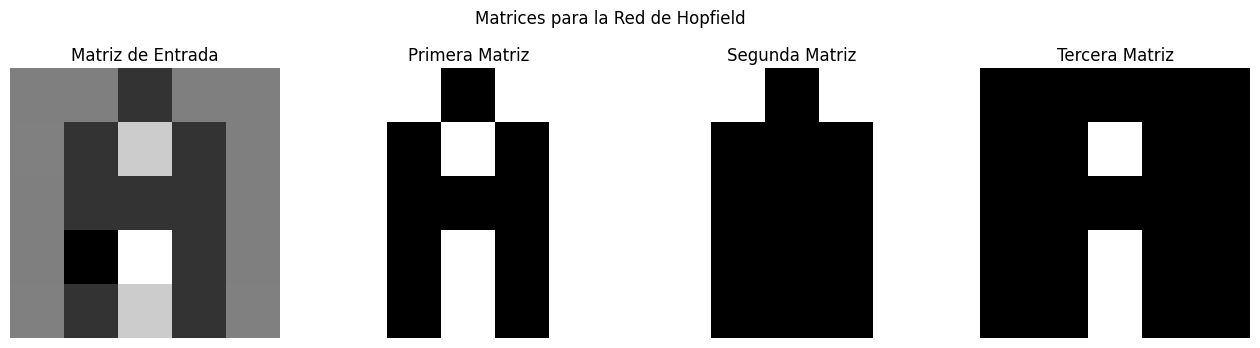

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz original después de SOM
matriz_entrada_hopfield = matriz_resultante_normalizada.copy()

# Primera matriz: Valores <= 84 se convierten en -1, otros en 1
matriz_hopfield_1 = np.where((matriz_entrada_hopfield >= 0) & (matriz_entrada_hopfield <= 84), -1, 1)

# Segunda matriz: Valores > 84 y <= 169 se convierten en 1, otros en -1
matriz_hopfield_2 = np.where((matriz_entrada_hopfield > 84) & (matriz_entrada_hopfield <= 169), 1, -1)

# Tercera matriz: Valores > 169 y <= 255 se convierten en 1, otros en -1
matriz_hopfield_3 = np.where((matriz_entrada_hopfield > 169) & (matriz_entrada_hopfield <= 255), 1, -1)

# Preparar la figura para mostrar las matrices
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Matrices para la Red de Hopfield')

# Visualizar la matriz original normalizada
axs[0].imshow(matriz_entrada_hopfield, cmap='gray')
axs[0].set_title('Matriz de Entrada')
axs[0].axis('off')

# Visualizar la primera matriz
axs[1].imshow(matriz_hopfield_1, cmap='gray')
axs[1].set_title('Primera Matriz')
axs[1].axis('off')

# Visualizar la segunda matriz
axs[2].imshow(matriz_hopfield_2, cmap='gray')
axs[2].set_title('Segunda Matriz')
axs[2].axis('off')

# Visualizar la tercera matriz
axs[3].imshow(matriz_hopfield_3, cmap='gray')
axs[3].set_title('Tercera Matriz')
axs[3].axis('off')

plt.show()


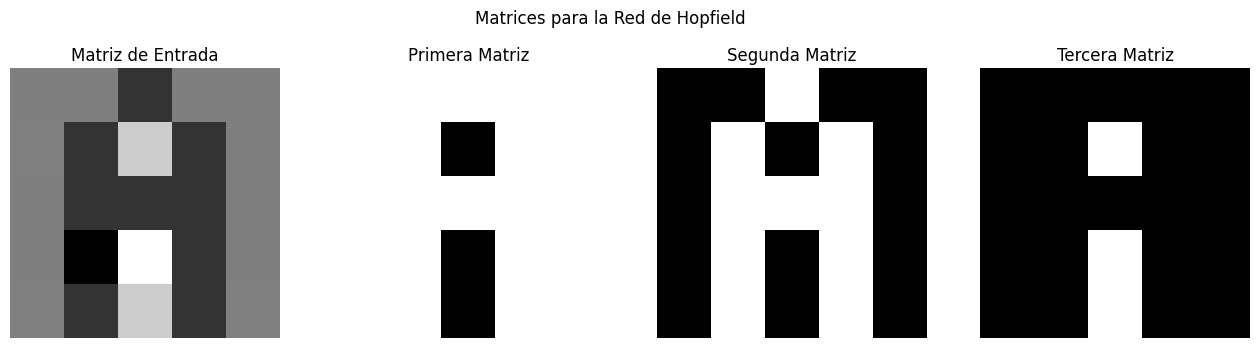

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz original después de SOM
matriz_entrada_hopfield = matriz_resultante_normalizada.copy()

# Primera matriz: Valores <= 0.75 se convierten en -1, otros en 1
matriz_hopfield_1 = np.where(matriz_entrada_hopfield >= 191, -1, 1)

# Segunda matriz: Valores >= 0.25 se convierten en 1, otros en -1
matriz_hopfield_2 = np.where(matriz_entrada_hopfield <= 64, 1, -1)

# Tercera matriz: Valores >= 0.5 se convierten en 1, otros en -1
matriz_hopfield_3 = np.where(matriz_entrada_hopfield >= 128, 1, -1)

# Guardar las matrices en archivos binarios (formato NumPy)
np.save('matriz_hopfield_1.npy', matriz_hopfield_1)
np.save('matriz_hopfield_2.npy', matriz_hopfield_2)
np.save('matriz_hopfield_3.npy', matriz_hopfield_3)

# Preparar la figura para mostrar las matrices
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Matrices para la Red de Hopfield')

# Visualizar la matriz original normalizada
axs[0].imshow(matriz_entrada_hopfield, cmap='gray')
axs[0].set_title('Matriz de Entrada')
axs[0].axis('off')

# Visualizar la primera matriz
axs[1].imshow(matriz_hopfield_1, cmap='gray')
axs[1].set_title('Primera Matriz')
axs[1].axis('off')

# Visualizar la segunda matriz
axs[2].imshow(matriz_hopfield_2, cmap='gray')
axs[2].set_title('Segunda Matriz')
axs[2].axis('off')

# Visualizar la tercera matriz
axs[3].imshow(matriz_hopfield_3, cmap='gray')
axs[3].set_title('Tercera Matriz')
axs[3].axis('off')

plt.show()


In [7]:
matriz_hopfield_cargada = np.load('matriz_hopfield_1.npy')

In [8]:
import numpy as np

def agregar_ruido(matriz_corrupta):
    # Copia la matriz corrupta para no modificar la original
    matriz_con_ruido = matriz_corrupta.copy()

    # Número de valores de -1 que deseas agregar
    num_ruidos = 4

    # Genera posiciones aleatorias únicas dentro de la matriz
    posiciones_aleatorias = np.random.choice(matriz_corrupta.size, num_ruidos, replace=False)

    # Agrega ruido en las posiciones seleccionadas
    matriz_con_ruido.flat[posiciones_aleatorias] = -1

    return matriz_con_ruido

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class RedHopfield(object):
    def entrenar_pesos(self, datos_entrenamiento):
        print("Comenzando el entrenamiento de pesos...")
        num_datos = len(datos_entrenamiento)
        self.num_neuronas = datos_entrenamiento[0].shape[0]
        # Inicializar los pesos
        W = np.zeros((self.num_neuronas, self.num_neuronas))
        rho = np.sum([np.sum(t) for t in datos_entrenamiento]) / (num_datos * self.num_neuronas)
        # Regla de Hebb
        for i in tqdm(range(num_datos)):
            t = datos_entrenamiento[i] - rho
            W += np.outer(t, t)
        # Hacer que los elementos diagonales de W sean 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_datos
        self.W = W

    def predecir(self, datos, num_iter=20, umbral=0, asincronico=False):
        print("Comenzando la predicción...")
        self.num_iter = num_iter
        self.umbral = umbral
        self.asincronico = asincronico
        # Copiar para evitar referencias
        datos_copiados = np.copy(datos)
        # Definir lista de predicciones
        predicciones = []
        for i in tqdm(range(len(datos))):
            predicciones.append(self._ejecutar(datos_copiados[i]))
        return predicciones

    def _ejecutar(self, estado_inicial):
        if self.asincronico == False:
            """
            Actualización síncrona
            """
            # Calcular la energía inicial del estado
            s = estado_inicial
            e = self._energía(s)
            # Iteración
            for i in range(self.num_iter):
                # Actualizar s
                s = np.sign(self.W @ s - self.umbral)
                # Calcular la nueva energía del estado
                e_nueva = self._energía(s)
                # s ha convergido
                if e == e_nueva:
                    return s
                # Actualizar la energía
                e = e_nueva
            return s
        else:
            """
            Actualización asincrónica
            """
            # Calcular la energía inicial del estado
            s = estado_inicial
            e = self._energía(s)
            # Iteración
            for i in range(self.num_iter):
                for j in range(100):
                    # Seleccionar una neurona aleatoria
                    idx = np.random.randint(0, self.num_neuronas)
                    # Actualizar s
                    s[idx] = np.sign(self.W[idx].T @ s - self.umbral)
                    # Calcular la nueva energía del estado
                    e_nueva = self._energía(s)
                    # s ha convergido
                    if e == e_nueva:
                        return s
                    # Actualizar la energía
                    e = e_nueva
            return s

    def _energía(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.umbral)

    def graficar_pesos(self):
        plt.figure(figsize=(6, 5))
        matriz_w = plt.imshow(self.W, cmap='coolwarm')
        plt.colorbar(matriz_w)
        plt.title("Pesos de la Red")
        plt.tight_layout()
        plt.savefig("pesos.png")
        plt.show()

Comenzando el entrenamiento de pesos...


100%|██████████| 6/6 [00:00<00:00, 21490.88it/s]

Matrices Originales y Corruptas:


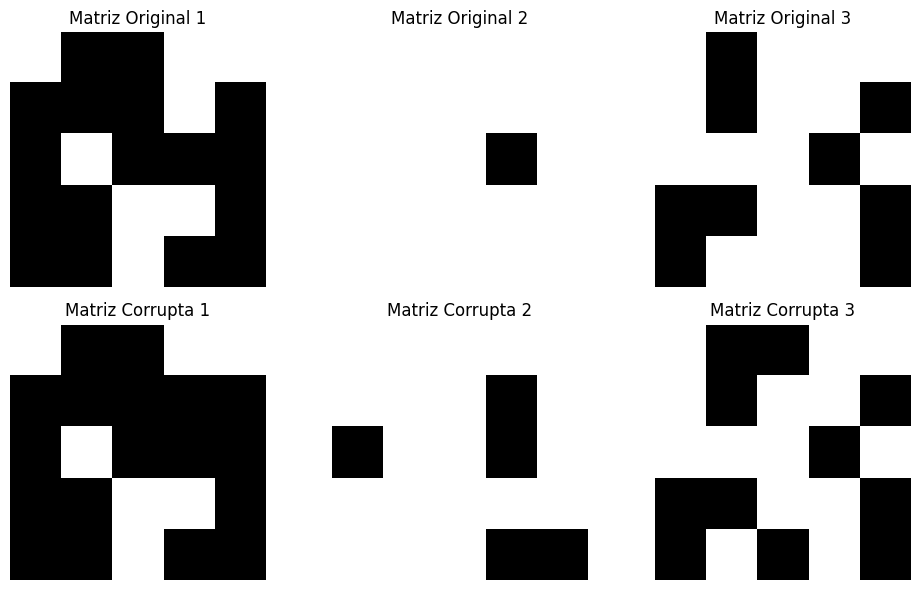

Comenzando la predicción...


100%|██████████| 3/3 [00:00<00:00, 2459.04it/s]

Matrices Recuperadas:


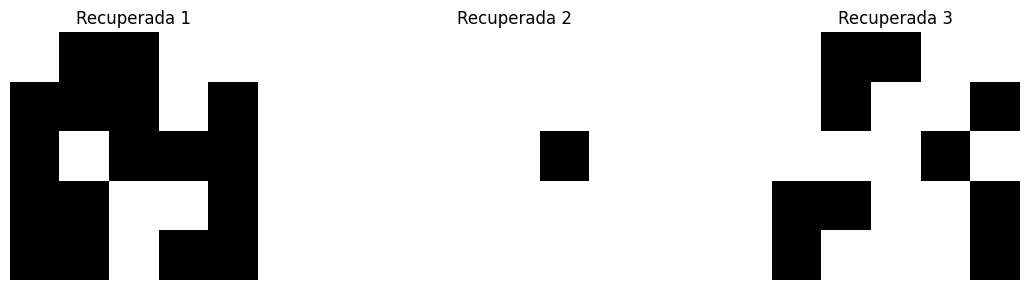

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def agregar_ruido(matriz_corrupta):
    # Copia la matriz corrupta para no modificar la original
    matriz_con_ruido = matriz_corrupta.copy()

    # Número de valores de -1 que deseas agregar
    num_ruidos = 4

    # Genera posiciones aleatorias únicas dentro de la matriz
    posiciones_aleatorias = np.random.choice(matriz_corrupta.size, num_ruidos, replace=False)

    # Agrega ruido en las posiciones seleccionadas
    matriz_con_ruido.flat[posiciones_aleatorias] = -1

    return matriz_con_ruido

# Matriz original después de SOM (cambia esto por tu matriz de entrada)
matriz_entrada_hopfield = np.random.rand(5, 5)

# Generar matrices Hopfield según las nuevas especificaciones
matriz_hopfield_1 = np.where(matriz_entrada_hopfield <= 0.75, -1, 1)
matriz_hopfield_2 = np.where(matriz_entrada_hopfield >= 0.25, 1, -1)
matriz_hopfield_3 = np.where(matriz_entrada_hopfield >= 0.5, 1, -1)

# Guardar las matrices en archivos binarios (formato NumPy)
np.save('matriz_hopfield_1.npy', matriz_hopfield_1)
np.save('matriz_hopfield_2.npy', matriz_hopfield_2)
np.save('matriz_hopfield_3.npy', matriz_hopfield_3)

# Crear instancias de la red de Hopfield
red_hopfield = RedHopfield()

# Crear un conjunto de datos de entrenamiento con las matrices originales y corruptas
datos_entrenamiento = [
    matriz_hopfield_1.flatten(),
    matriz_hopfield_2.flatten(),
    matriz_hopfield_3.flatten(),
    agregar_ruido(matriz_hopfield_1).flatten(),
    agregar_ruido(matriz_hopfield_2).flatten(),
    agregar_ruido(matriz_hopfield_3).flatten()
]

# Entrenar la red de Hopfield con los datos de entrenamiento
red_hopfield.entrenar_pesos(datos_entrenamiento)

# Imprimir las matrices originales y corruptas
print("Matrices Originales y Corruptas:")
plt.figure(figsize=(10, 6))
for i in range(len(datos_entrenamiento)):
    plt.subplot(2, len(datos_entrenamiento) // 2, i + 1)
    plt.imshow(datos_entrenamiento[i].reshape(5, 5), cmap='gray')
    if i < 3:
        plt.title('Matriz Original {}'.format(i + 1))
    else:
        plt.title('Matriz Corrupta {}'.format(i - 2))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Crear un conjunto de datos de prueba con las matrices corruptas
datos_prueba = [
    agregar_ruido(matriz_hopfield_1).flatten(),
    agregar_ruido(matriz_hopfield_2).flatten(),
    agregar_ruido(matriz_hopfield_3).flatten()
]

# Intentar recuperar las matrices corruptas utilizando la red de Hopfield
resultados = red_hopfield.predecir(datos_prueba)

# Imprimir las matrices recuperadas y su título
print("Matrices Recuperadas:")
plt.figure(figsize=(12, 3))
for i in range(len(resultados)):
    plt.subplot(1, len(resultados), i + 1)
    plt.imshow(resultados[i].reshape(5, 5), cmap='gray')
    plt.title('Recuperada {}'.format(i + 1))
    plt.axis('off')
plt.tight_layout()
plt.show()
